# 含有单个连续型解释变量的模型

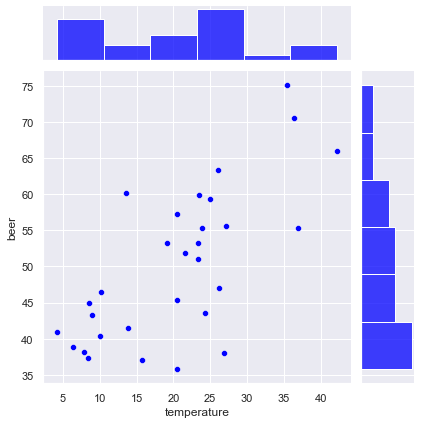

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# 用于统计模型的库，部分版本会报错
import statsmodels.formula.api as smf
import statsmodels.api as sm
# 设置浮点数打印精度
%precision 3
# 在Jupter Notebook中显示图形
%matplotlib inline
beer = pd.read_csv("./data/5-1-1-beer.csv")
beer.head()
sns.jointplot(x = "temperature", y = "beer",
              data = beer, color = "blue")

## 建模
啤酒销售额 ~ N(β₀ + β₁ X 气温, σ²)
建立一般的正态模型


In [2]:
# 使用statsmodels实现模型化
# 注意这个~符号
in_model = smf.ols(formula = "beer ~ temperature",data = beer).fit()

in_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Fri, 24 Dec 2021   Prob (F-statistic):           1.11e-05
Time:                        16:39:43   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 使用AIC进行模型选择
ols(最小二乘法)

In [8]:
null_model = smf.ols("beer ~ 1", data = beer).fit()
null_model.aic
in_model.aic

# 含有解释变量的模型的AIC更小
in_model.llf

# 解释变量个数
in_model.df_model

# 最终的AIC计算如下:
-2 * (in_model.llf - (in_model.df_model + 1))



208.90902935575437

### 回归直线
模型预测的响应变脸的图形就是回归直线


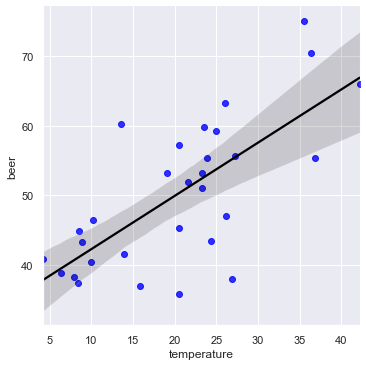

In [11]:
sns.lmplot(x = "temperature", y = "beer", data = beer, scatter_kws = {"color":"blue"},
                line_kws = {"color":"black"})


### 使用模型进行预测


In [12]:
in_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])